<a href="https://githubtocolab.com/SainsburyWellcomeCentre/NeuralPlayground/examples/colab_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuralPlayground Introduction
## If you using colab, install requirements 

In [5]:
pip install neuralplayground

Cloning into 'NeuralPlayground'...
remote: Enumerating objects: 5586, done.
remote: Counting objects: 100% (1092/1092), done.
remote: Compressing objects: 100% (397/397), done.
remote: Total 5586 (delta 801), reused 864 (delta 688), pack-reused 4494
Receiving objects: 100% (5586/5586), 440.77 MiB | 5.23 MiB/s, done.
Resolving deltas: 100% (3330/3330), done.


## From here if you installed the package and re-started the kernel

In [1]:
import neuralplayground
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Experiments

This class gives access to open-source experimental data (neural recording, behaviours, etc.) through various plotting
functions and visualisations of experimental measurements. Each data set is organised in recordings session with an
attributed recording number (rec index), given in a list at the initialisation of the class. It is possible to plot a
selected tetrode (select the index in the list) recording ```plot_recording_tetr()```, the trajectory recording
within the arena ```plot_trajectory()``` and get access to the experimental details call ```show_keys()```.
For further explanation of the datasets, check the [notebook examples](https://github.com/ClementineDomine/NeuralPlayground/blob/main/examples/experimental_examples/experimental_data_examples.ipynb) using this class.

In [2]:
from neuralplayground.experiments import Sargolini2006Data

In [3]:
sargolini_data = Sargolini2006Data(verbose=True)

The sample includes conjunctive cells and head direction cells from layers III and V of medial entorhinal cortex and have  been published in 
Sargolini et al. (Science, 2006). 

The files are in matlab format. They include spike and position times for recorded cells from rats that were running in a 1 x 1 m
enclosure. The cells were recorded in the dorsocaudal 25% portion of the medial entorhinal cortex. Position is given for two LEDs 
to enable calculation of head direction.

The cell id is based on tetrode number and cell number (i.e: t2c7).

The file naming convention is as follow:

Rat number - session number _ cell id (i.e: 11084-03020501_t2c1).

Each session duration is normally 10 minutes, but some sessions are combination of 2 or more 10 minutes sessions, this is marked in 
the file name by using "+" between the session numbers (i.e: 11207-21060501+02_t6c1). Note that the 6 first digits in the session 
number is the date of the recording.

When loading the files into Matlab you 

,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


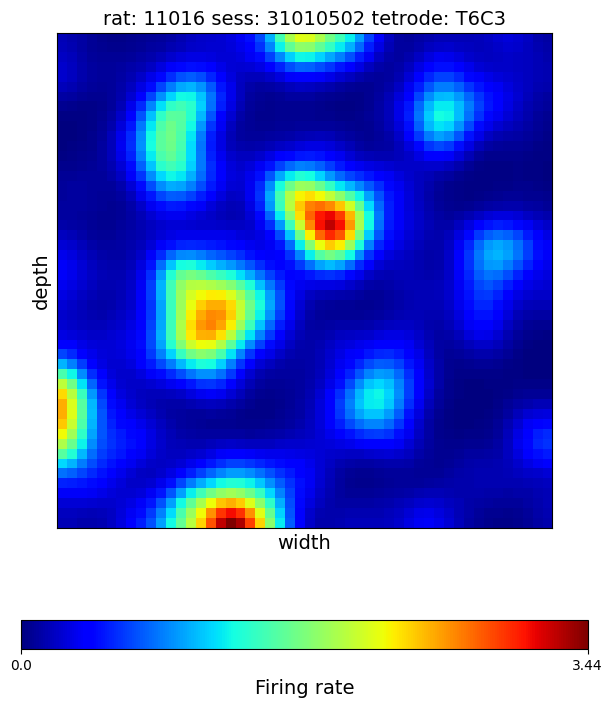

In [4]:
rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(recording_index=4, tetrode_id = "T6C3")

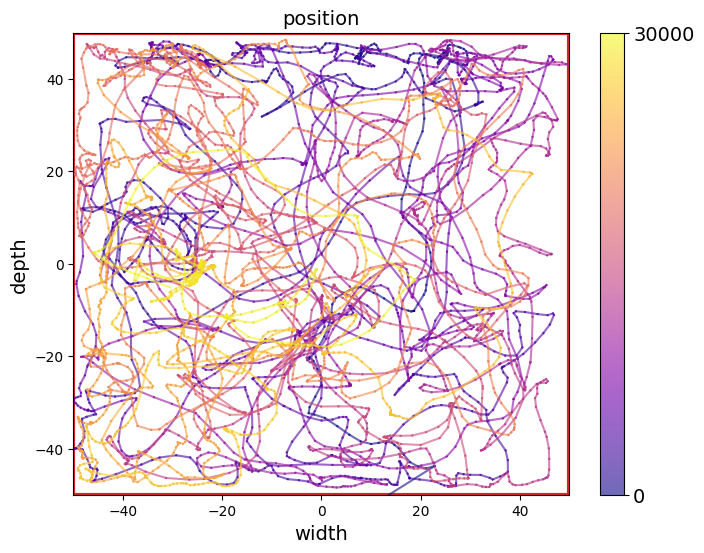

In [5]:
x, y, time_steps = sargolini_data.plot_trajectory(recording_index=4, plot_every=5)

# Arenas

Arena provides an environment in which an agent can explore and potentially learn
over time, reproducing aspects of the physical layout of an experimental paradigm in which behavioral and neural data
were collected. Any two-dimensional discrete and continuous Arenas can be built
using walls as construction units. This allows complex experimental architectures such as connected rooms, T-mazes
or cycles to be added. Dynamical arenas, such as the merging room experiment in [Wernle et
al. (2018)](https://github.com/ClementineDomine/NeuralPlayground/blob/main/neuralplayground/arenas/wernle_2018.py)
are also be implemented. Each specific environment implemented to resemble an experimental setting should be
created as a subclass of the main environment class. The Environment can be initialised with data from real-life
experiments. We will work toward improving each of the Environments through the projects, adding experimental specifications,
richer perceptual inputs and flexibility to analyze and run simulations.

Check the [arena examples notebook](https://github.com/ClementineDomine/NeuralPlayground/blob/main/examples/arena_examples/arena_examples.ipynb) for further explanation.

In [6]:
from neuralplayground.arenas import Simple2D, ConnectedRooms

In [7]:
from neuralplayground.agents import RandomAgent, LevyFlightAgent
# Random agent generates a brownian motion. Levy flight is still experimental.
agent = LevyFlightAgent(step_size=0.8, scale=2.0, loc=0.0, beta=1.0, alpha=0.5, max_action_size=100)

In [8]:
time_step_size = 0.1 #seg
agent_step_size = 3

# Init environment
env = Simple2D(time_step_size = time_step_size,
               agent_step_size = agent_step_size,
               arena_x_limits=(-100, 100), 
               arena_y_limits=(-100, 100))

In [9]:
n_steps = 5000#50000

# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)

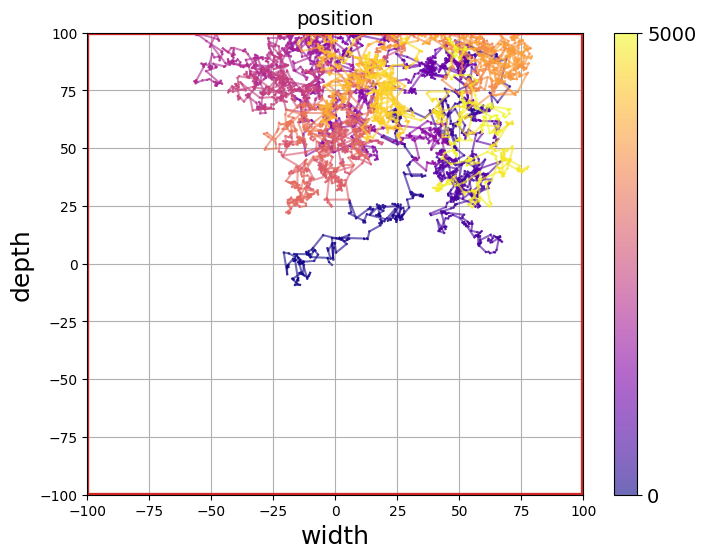

In [10]:
ax = env.plot_trajectory()
fontsize = 18
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
# plt.savefig("two_rooms.pdf", bbox_inches="tight")
plt.show()

# Agents

This class includes a set of functions that control the ways intelligent systems interact
with their surroundings (i.e., the environment). An agent receives observations from the environment (reward, visual cues, etc.) and uses these to take an action which in turn will update both its state and the state of the environment, generating new observations. More generally, the Agent can be thought of as an animal performing the task in the simulated experiment. All agent types will be given a set of abilities that are summarised in the agent’s main class. Each different model developed can be easily implemented as a subclass of the main one.

In [11]:
from neuralplayground.agents import Weber2018

In [12]:
# Parameters for a square environment
room_width = [-10,10]
room_depth = [-10,10]
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5

# Init environment
envsimple = Simple2D(arena_x_limits = room_width,
                     arena_y_limits = room_depth,
                     time_step_size = time_step_size,
                     agent_step_size = agent_step_size)

In [13]:
exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
roh = 1
agent = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                  sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=roh,
                  Nef=Nef, Nif=Nif, room_width=envsimple.room_width, room_depth=envsimple.room_depth,
                  alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4900/4900 [00:03<00:00, 1367.04it/s]


In [ ]:
plot_every = 25000  # 100000
total_iters = 0
n_steps = 100000 # 400000 For cleaner results
obs, state = envsimple.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action, the first to numbers in the observation are the xy position of the agent
    obs = obs[:2]
    action = agent.act(obs)
    # rate = agent.update()
    agent.update()
    # Run environment for given action
    obs, state, reward = envsimple.step(action, normalize_step=True)
    total_iters += 1
    if i % plot_every == 0 or i == n_steps - 1:
        agent.plot_rate_map()

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 95801/100000 [08:35<00:21, 196.57it/s]

# Comparison

In this notebook, we show some examples of comparisons between simulations of theoretical models and experimental data, being this the main goal of our software in the long term. 

This aspect of the NeuralPlayground (NPG) software is still under development. With time, we want to implement tools exclusively made to compare simulated and experimental data, such as a GUI to quickly navigate through the results, add more metrics to measure the performance of agents or similarity between neural representation.

We compare two agents in the same environement and compare their representations. The runs have been previoulsy run using the simulation manager, the output was saved to the gin repositiory for ease.

In [ ]:
from neuralplayground.saved_models import fetch_model_path
import pandas as pd
from neuralplayground.comparison import GridScorer
from neuralplayground.plotting.plot_utils import make_plot_trajectories , make_plot_rate_map, make_agent_comparison

In [ ]:


data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)


data_path = fetch_model_path("weber_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]

make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)